In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
def visualize_preds(table,y_true, y_pred, title):
    ls = []
    f = plt.figure(figsize = (8,8))
    cf = confusion_matrix(y_true, y_pred)
    sb.heatmap(cf, fmt='.0f', annot=True)
    
    accuracy  = np.trace(cf) / float(np.sum(cf))

    # Metrics for Binary Confusion Matrices
    if sum(cf[:,1]) == 0:
        precision = 0.0;
    else:
        precision = cf[1,1] / sum(cf[:,1])
        
    if sum(cf[1,:]) == 0:
        recall = 0.0;
    else:
        recall    = cf[1,1] / sum(cf[1,:])
        
    if (precision + recall) == 0:
        f1_score = 0.0;
    else:
        f1_score  = 2 *precision * recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
        accuracy,precision,recall,f1_score)
    
    ls.append(accuracy)
    ls.append(precision)
    ls.append(recall)
    ls.append(f1_score)
    ls = pd.DataFrame(ls)
    table = pd.concat([table,ls], axis = 1)
    
    plt.xlabel('Predicted' + stats_text)
    plt.ylabel('Actual')
    plt.title(title)
    
    return table

In [4]:
table1 = pd.DataFrame()
table2 = pd.DataFrame()

## Importing Original Data

In [5]:
#IMPORTING CLEAN DATA USING RANDOM SAMPLING
train = pd.read_csv("projectData/train.csv", index_col=0)
train

,NEO_REFERENCE_ID,EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),RELATIVE_VELOCITY_KM_PER_SEC,MISS_DIST.(KILOMETERS),PERIHELION_DISTANCE,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION,HAZARDOUS,RISK_CATEGORY
2586,3529625,183.888672,411.187571,9.551351,27837396.0,0.783714,1.338152,2457843.686,141.435423,0.901929,False,1
29,3182169,50.647146,113.250461,3.838017,12937927.0,0.894596,1.275511,2458019.676,343.278084,0.872021,False,0
1677,3256739,253.837029,567.596853,6.477856,72234080.0,1.239713,2.001073,2457878.935,58.087470,0.477830,False,1
1833,3761549,334.622374,748.238376,18.027267,25818802.0,0.993025,1.966328,2458313.630,188.533899,0.547588,True,2
3632,3653520,69.912523,156.329154,24.300910,71082192.0,0.922122,3.114245,2457587.296,142.045632,0.343766,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2972,3648642,29.144390,65.168838,5.792225,6990692.5,0.617199,1.075825,2458100.540,233.401850,1.265477,False,0
3295,3711170,16.016034,35.812940,7.519185,2379111.0,0.982878,2.842302,2458019.666,352.858271,0.372624,False,0
271,3663258,10.581689,23.661375,8.965194,23981302.0,0.567981,1.290169,2457956.558,48.361916,1.100596,False,0
2522,3430406,221.082810,494.356193,5.432581,21529706.0,1.127583,3.110956,2458014.795,355.433174,0.319466,False,1


## Classification of Train by Logistic Regression

In [16]:
#Assign x and y value
y_train = train['RISK_CATEGORY']
X_train = train.drop('RISK_CATEGORY', axis=1)

#The correlation of data
train.corr()

,NEO_REFERENCE_ID,EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),RELATIVE_VELOCITY_KM_PER_SEC,MISS_DIST.(KILOMETERS),PERIHELION_DISTANCE,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION,HAZARDOUS,RISK_CATEGORY
NEO_REFERENCE_ID,1.000000,-0.605986,-0.605986,-0.123615,-0.120840,0.095651,0.008699,-0.039339,-0.033372,-0.008983,-0.266475,-0.453650
EST_DIA_IN_M(MIN),-0.605986,1.000000,1.000000,0.325764,0.287542,-0.041387,0.284903,0.004181,0.032517,-0.222898,0.297893,0.743998
EST_DIA_IN_M(MAX),-0.605986,1.000000,1.000000,0.325764,0.287542,-0.041387,0.284903,0.004181,0.032517,-0.222898,0.297893,0.743998
RELATIVE_VELOCITY_KM_PER_SEC,-0.123615,0.325764,0.325764,1.000000,0.377874,-0.464018,0.098421,0.000847,0.011307,0.064347,0.204170,0.531762
MISS_DIST.(KILOMETERS),-0.120840,0.287542,0.287542,0.377874,1.000000,-0.051445,-0.062623,0.013459,-0.052337,0.060199,0.021662,0.305724
PERIHELION_DISTANCE,0.095651,-0.041387,-0.041387,-0.464018,-0.051445,1.000000,0.344681,0.000719,-0.018617,-0.652598,-0.195220,-0.207840
APHELION_DIST,0.008699,0.284903,0.284903,0.098421,-0.062623,0.344681,1.000000,0.004572,0.029824,-0.856205,0.067267,0.218472
PERIHELION_TIME,-0.039339,0.004181,0.004181,0.000847,0.013459,0.000719,0.004572,1.000000,0.413593,0.003212,0.015577,0.007342
MEAN_ANOMALY,-0.033372,0.032517,0.032517,0.011307,-0.052337,-0.018617,0.029824,0.413593,1.000000,-0.008678,0.033564,0.023840
MEAN_MOTION,-0.008983,-0.222898,-0.222898,0.064347,0.060199,-0.652598,-0.856205,0.003212,-0.008678,1.000000,-0.008138,-0.118487


In [24]:
# Calculate the odds of an NEO being hazardous
odds_of_hazardous = train['RISK_CATEGORY'].value_counts()[1] / train['RISK_CATEGORY'].value_counts()[0]
print("The odds of a NEO being hazardous in the dataset is:", odds_of_hazardous)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)

# Print out the mean accuracy
print("The overall classification accuracy:", logreg1.score(X_test, y_test))

The odds of a NEO being hazardous in the dataset is: 1.6242424242424243
The overall classification accuracy: 0.510556621880998


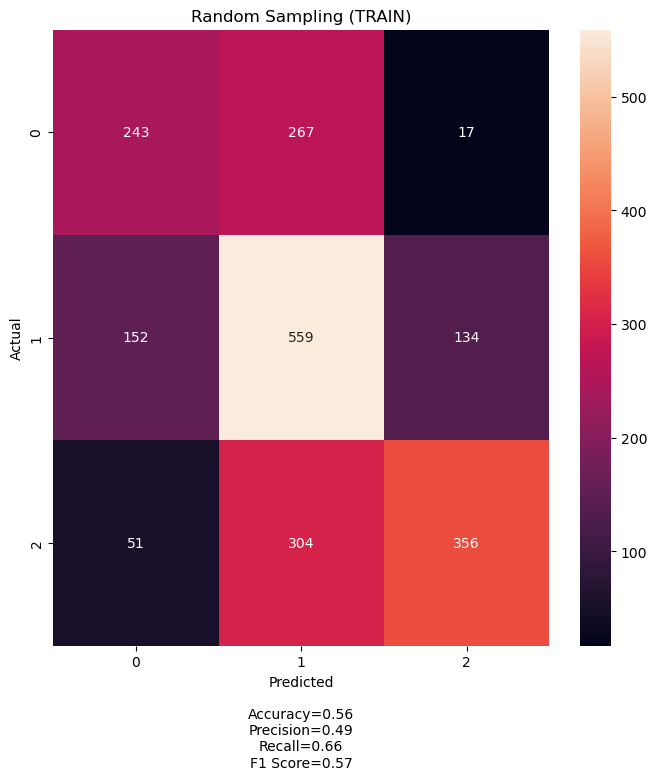

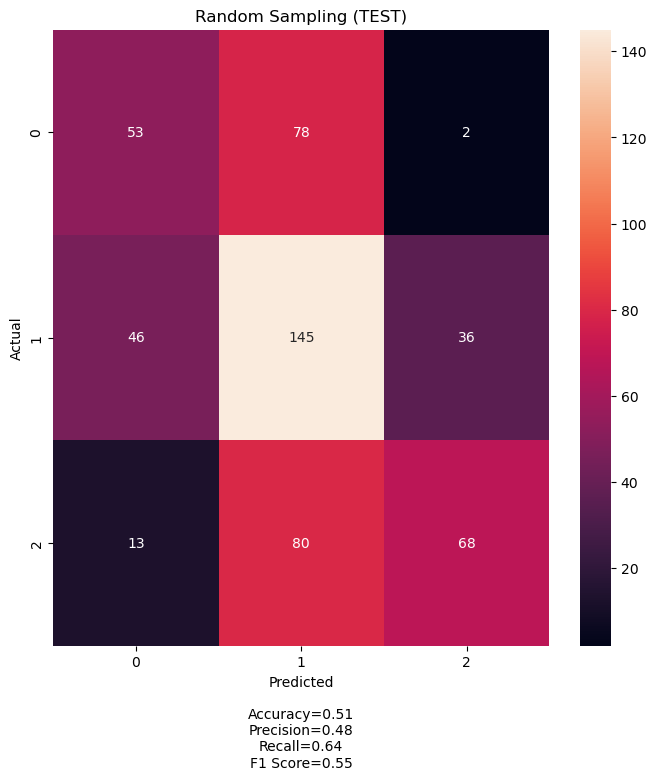

In [25]:
#Predict the data
y_train_pred = logreg1.predict(X_train)
y_test_pred = logreg1.predict(X_test)

#Visualizing the data
table1 = visualize_preds(table1,y_train,y_train_pred, title = 'Random Sampling (TRAIN)')
table2 = visualize_preds(table2,y_test,y_test_pred, title = 'Random Sampling (TEST)')

## Importing Bootstrapping Data

In [20]:
#IMPORTING CLEANED TRAIN DATA USING BOOTSTRAP SAMPLING
bootstrapping_train = pd.read_csv("projectData/bootstrapping_train.csv", index_col = 0)
bootstrapping_train

,NEO_REFERENCE_ID,EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),RELATIVE_VELOCITY_KM_PER_SEC,MISS_DIST.(KILOMETERS),PERIHELION_DISTANCE,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION,RISK_CATEGORY
0,3529625,183.888672,411.187571,9.551351,27837396.0,0.783714,1.338152,2457843.686,141.435423,0.901929,1
1,3256739,253.837029,567.596853,6.477856,72234080.0,1.239713,2.001073,2457878.935,58.087470,0.477830,1
2,3653520,69.912523,156.329154,24.300910,71082192.0,0.922122,3.114245,2457587.296,142.045632,0.343766,1
3,3071917,265.800000,594.346868,10.896092,33441924.0,1.163723,2.113338,2458007.502,356.709786,0.469918,1
4,3766293,23.150212,51.765448,13.348297,25744922.0,0.826214,1.215543,2457845.152,148.439096,0.955528,1
...,...,...,...,...,...,...,...,...,...,...,...
3011,3455137,265.800000,594.346868,11.027074,39404808.0,0.601085,1.073320,2457864.451,175.046953,1.286644,2
3012,3626029,110.803882,247.765013,21.353475,64967668.0,0.562154,1.246986,2458122.294,220.469764,1.145621,2
3013,2140333,461.907460,1032.856481,23.062280,71000704.0,0.498651,1.425153,2457943.386,59.669559,1.044739,2
3014,3672899,127.219878,284.472297,12.747317,51848572.0,0.580992,1.433941,2457777.421,187.560356,0.974671,2


## Classification of Bootstrapping Train by Logistic Regression

In [23]:
#Assign x and y value
y_train = bootstrapping_train['RISK_CATEGORY']
X_train = bootstrapping_train.drop('RISK_CATEGORY', axis=1)

#The correlation of data
bootstrapping_train.corr()

,NEO_REFERENCE_ID,EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),RELATIVE_VELOCITY_KM_PER_SEC,MISS_DIST.(KILOMETERS),PERIHELION_DISTANCE,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION,RISK_CATEGORY
NEO_REFERENCE_ID,1.000000,-0.618831,-0.618831,-0.151834,-0.140294,0.091917,-0.021162,-0.033407,-0.029823,0.011743,-0.479055
EST_DIA_IN_M(MIN),-0.618831,1.000000,1.000000,0.361889,0.309330,-0.049923,0.305124,-0.006426,0.028137,-0.232216,0.770747
EST_DIA_IN_M(MAX),-0.618831,1.000000,1.000000,0.361889,0.309330,-0.049923,0.305124,-0.006426,0.028137,-0.232216,0.770747
RELATIVE_VELOCITY_KM_PER_SEC,-0.151834,0.361889,0.361889,1.000000,0.394238,-0.461743,0.124398,-0.003826,0.004033,0.049214,0.556444
MISS_DIST.(KILOMETERS),-0.140294,0.309330,0.309330,0.394238,1.000000,-0.068564,-0.052605,0.022695,-0.049251,0.065749,0.331148
PERIHELION_DISTANCE,0.091917,-0.049923,-0.049923,-0.461743,-0.068564,1.000000,0.336752,-0.002204,-0.024931,-0.649187,-0.204291
APHELION_DIST,-0.021162,0.305124,0.305124,0.124398,-0.052605,0.336752,1.000000,-0.004642,0.010896,-0.856447,0.248803
PERIHELION_TIME,-0.033407,-0.006426,-0.006426,-0.003826,0.022695,-0.002204,-0.004642,1.000000,0.413374,0.011472,-0.012867
MEAN_ANOMALY,-0.029823,0.028137,0.028137,0.004033,-0.049251,-0.024931,0.010896,0.413374,1.000000,0.009357,0.018118
MEAN_MOTION,0.011743,-0.232216,-0.232216,0.049214,0.065749,-0.649187,-0.856447,0.011472,0.009357,1.000000,-0.138531


In [26]:
# Calculate the odds of an NEO being hazardous
odds_of_hazardous = bootstrapping_train['RISK_CATEGORY'].value_counts()[1] / bootstrapping_train['RISK_CATEGORY'].value_counts()[0]
print("The odds of a NEO being hazardous in the dataset is:", odds_of_hazardous)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression()
logreg2.fit(X_train, y_train)

# Print out the mean accuracy
print("The overall classification accuracy:", logreg2.score(X_test, y_test))

The odds of a NEO being hazardous in the dataset is: 1.0
The overall classification accuracy: 0.510556621880998


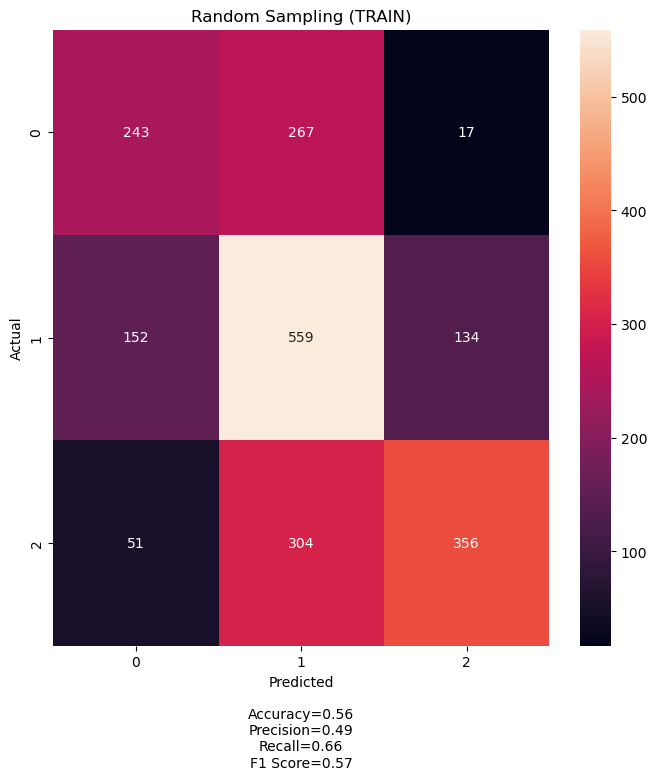

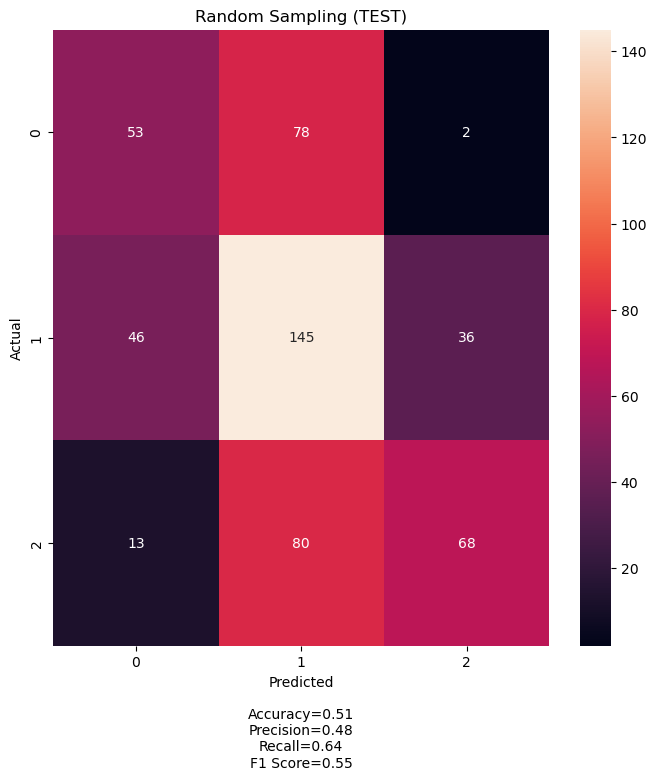

In [27]:
#Predict the data
y_train_pred = logreg2.predict(X_train)
y_test_pred = logreg2.predict(X_test)

#Visualizing the data
table1 = visualize_preds(table1,y_train,y_train_pred, title = 'Random Sampling (TRAIN)')
table2 = visualize_preds(table2,y_test,y_test_pred, title = 'Random Sampling (TEST)')